# 5 Plotting, Data Visualization and Exploration: a random walk exploration

*Disclaimer: The "Plotting" section of this session is based in [this](https://github.com/peterwittek/qml-rg/blob/master/Archiv_Session_Spring_2017/Tutorials/Python_for_Science.ipynb) tutorial by Peter Wittek*

## Introduction

In this session, we will explore the tools that Python offers to plot and visualize data. The *art* of making nice plots is something that takes some time, but making our first plots is really simple. In this tutorial, we will focus in the library [Matplotlib](http://matplotlib.org/), which is, probably together with `numpy` or `pandas`, the package that you will always need to import in most of your projects. 

In order to see its full potential, we will use it to explore a precise problem which lays at the heart of statistics: the [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). This session will then have two steps: first, we will learn the basics of Matplotlib; second, we will study how to go from a purely theoretical problem to its numerical simulation and use Matplotlib to visualize the results.

Let's start by importing the necessary packages. For the initial part of this tutorial, we will only need on class of Matplotlib, `pyplot`, which has most of what we usually need for plotting:

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
print('Matplotlib:', matplotlib.__version__)
print('Numpy:', np.__version__)

Matplotlib: 3.1.3
Numpy: 1.18.1


Notice the line that starts with %. This is a 'magic command' specific to Jupyter. It ensures that images will be plotted inline, instead of popping up in a window. You can look at all magic commands by entering `%quickref`. Some are useful, although most of them are not. The magic commands are not part of Python, so calling them in a script will throw an error. Keep this in mind when you copy code from a notebook.

## Plotting


#### The Basics

This is the bare minimum you need to plot a function:

In [5]:
# np.linspace(0,5,5)  5 plots from 0 to 5 to the function we introduce

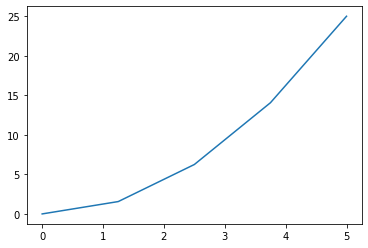

In [34]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2);

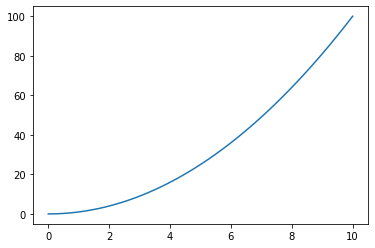

In [35]:
x=np.linspace(0,10,100)
plt.plot(x, x**2);

In [36]:
np.nan?


Type:        float
String form: nan
Docstring:   Convert a string or number to a floating point number, if possible.


In [10]:
#nan: not a number

We imported the module `matplotlib.plot` as `plt`, and we call a function of it called `plot` to plot the square function. You always plot discrete points: `x` is a numpy array containing five points as a linear approximation between zero and five. On closer inspection, the curve is not smooth: this is because five points are not enough for the illusion of smoothness. Let us add some more points, labels for the axes, and a title for the figure:

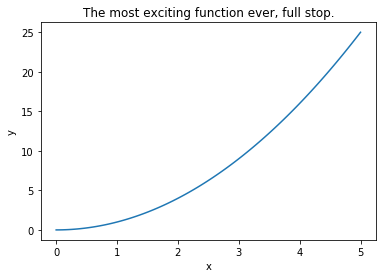

In [37]:
x = np.linspace(0, 5, 100)
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('The most exciting function ever, full stop.');

In [11]:
#if we want to write equations as in LaTEX, r'$s^2$

We can check in more detail by changing the line style of the lines as follows:

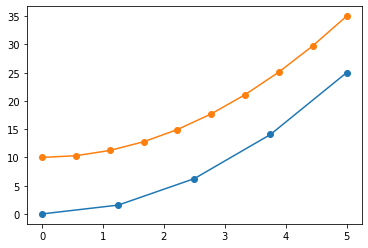

In [38]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2, 'o-');

x = np.linspace(0, 5, 10)
plt.plot(x, 10+x**2, 'o-')

The order in which you add the decorations to your figure does not matter. Everything that you write to appear in the cell will appear. This is because the execution of the cell triggers the call of the function `plt.show()`, which instructs Matplotlib to draw the figure *and* display it. In a Python script, you would always call `plt.show()` manually. Let us plot the cube function too, and call `plt.show()` manually:

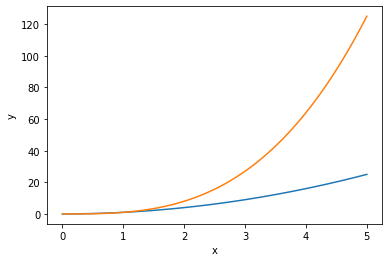

In [39]:
x = np.linspace(0, 5, 100)
y1 = x**2
y2 = x**3
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [20]:
#plt.show() does the plot we have until the line


We can use this to check what happens when taking more or less points for the plots, by changing the line style as:

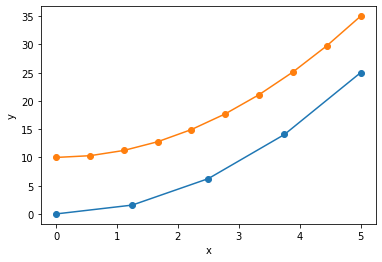

In [40]:
x = np.linspace(0, 5, 5)
plt.plot(x, x**2, 'o-');

x = np.linspace(0, 5, 100)
plt.plot(x, 10+x**2, 'o-')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Other useful line styles:

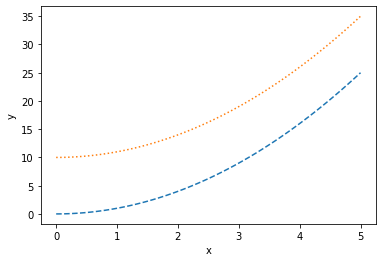

In [46]:
x = np.linspace(0, 5, 100)
plt.plot(x, x**2, ls = '--');

x = np.linspace(0, 5, 100)
plt.plot(x, 10+x**2, ls = ':')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice the difference with this case:

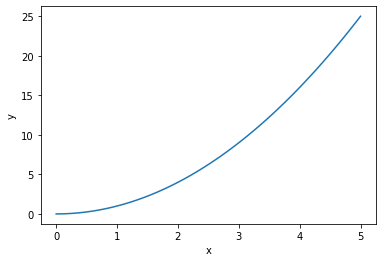

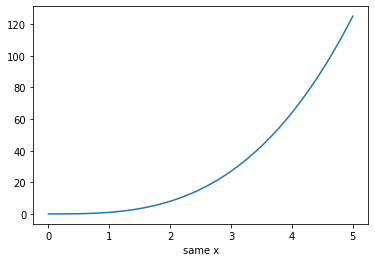

In [47]:
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.xlabel('same x')
plt.plot(x, y2)
plt.show()

The `plt.show()` resets all settings after displaying, so for the second figure, you must set the axes again (note the difference in axes labels)

Instead of showing the plot on the screen, you can write them to a file, which will also trigger Matplotlib to draw the figure. If you export it to PDF, it will be as scale-invariant as it can possibly be.

In [48]:
plt.plot(x, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('whatever.pdf')
plt.close()

In [49]:
x.shape

(100,)

In [45]:
y.shape

(100,)

So, in order to plot correctly we need x and y to get the same dimension. We can see if that happens by typing x.shape or y.shape. This needs to be changed when using x = np.linspace(0, 5, 100), the last number has to be the same with all variables.

You should find the plot right in the directory of the notebook.

Here we plotted, and we exported the plot as a PDF, in the same directory

#### Object-oriented Paradigm

The image that you see displayed is composed of a hierarchical structure of components. On the top level, it is an instance of the `Figure` class. This is what `plt.plot()` creates for you, with all the other underlying structures within; this function is for your convenience to avoid dealing with classes if you want a simple plot. The structures in the hierarchy include the area where you draw, which is technically called the `Axes` class. You may have more than one `Axes` if you have subplots or embedded plots. `Axes` than have x and y axes, which in turn have a scale, ticks, labels, and so on. If you have a single `Axes` class instantiated, like in the examples below, you can access and change most parts of the hierarchy like you did above with the x and y labels and the figure title. If you want to do anything non-trivial, you have to compose the figure and its components yourself. The examples in this section are mainly from [this tutorial](https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). A more detailed version of the plot of the square function is:

ordre: files, columnes (football club)

com ordenem els plots aquí? fig.add_subplot(num.files num.columnes posicio del grafic

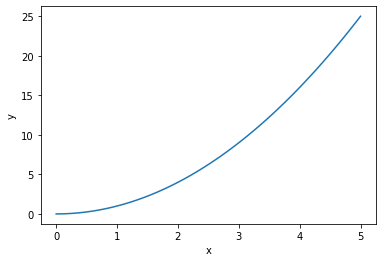

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()

ValueError: num must be 1 <= num <= 1, not 2

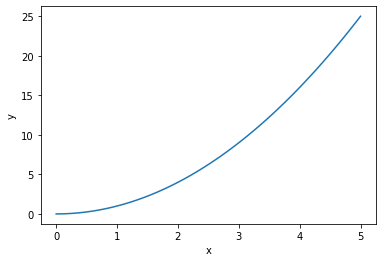

In [53]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')


ax1 = fig.add_subplot(112)
ax1.plot(x, x**2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


plt.show()

Armed with this knowledge, we can do inserts:

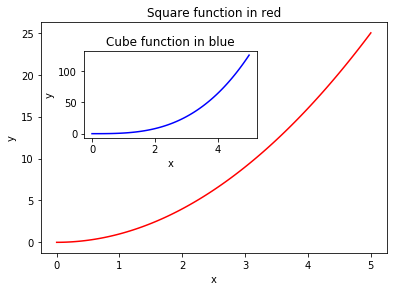

In [54]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes. The structure is [left, bottom, width, height]
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

#first we have defined the axes, then, we do the plots inside those axes.

# main figure, r means red, below, b means blue. To change style of the lines, add '--' for example. If we have multiple features that we want on a plot we should define it on the variables
axes1.plot(x, y1, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Square function in red')

# insert
axes2.plot(x, y2, 'b')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('Cube function in blue')
plt.show()

In [55]:
def silly_func(a,b,c):
    return(a+b)*c

In [56]:
silly_func(1,3,2)

8

Above we have a positional function, if we don't put anything, it works in the order as established. We can't do anything in between, as in


In [57]:
silly_func(a=1,3,c=2)

SyntaxError: positional argument follows keyword argument (<ipython-input-57-cf75d67b8a06>, line 1)

But, we can do (1,b=2, c=1), keyboard arguments have to follow the non-defined by keyboard ones. Colours in python can be found by C0, C1.........

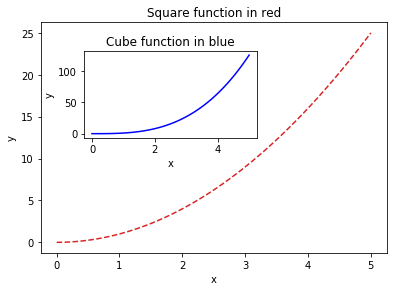

In [65]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes. The structure is [left, bottom, width, height]
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # insert axes

#first we have defined the axes, then, we do the plots inside those axes.

# main figure, r means red, below, b means blue. To change style of the lines, add '--' for example. If we have multiple features that we want on a plot we should define it on the variables
axes1.plot(x, y1, c='C3', ls='--')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Square function in red')

# insert
axes2.plot(x, y2, 'b')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('Cube function in blue')
plt.show()

You can also do aribtrary grids of subplots. The function `plt.subplots` conveniently creates you the figure object and returns it to you along with the axes:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C9AB04388>,
      dtype=object)

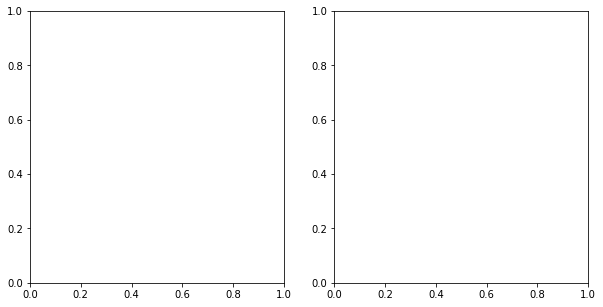

In [66]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
axes

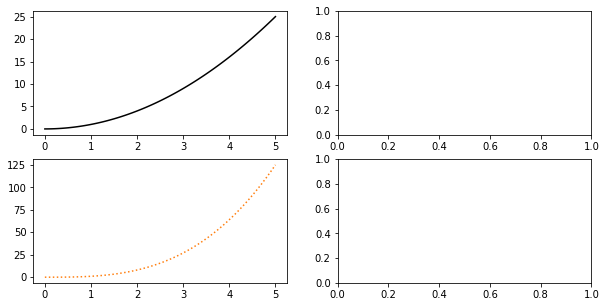

In [73]:
fig,axes =plt.subplots(ncols=2, nrows=2, figsize=(10,5))
axes[0,0].plot(x,y1,'k') #first axe created(left). k is black
axes[1,0].plot(x,y2, ls=":", c="C1")

In [74]:
for i in axes:
    print(i)

here we're defining y as a list, and the colour are also defined in a list. We're looping over functions and colours.

Putting zip in a for loop: We loop over all variables. each one with each, as seen there: Doesn't really work, but zip should allow us making the plot in the following example without enumerate and avoiding defining more stuff.

In [77]:
for (ax, y, l, c) in zip(axes, y_values, labels, colors):
    ax.plot(x,y,c)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(l)
plt.show()

NameError: name 'y_values' is not defined

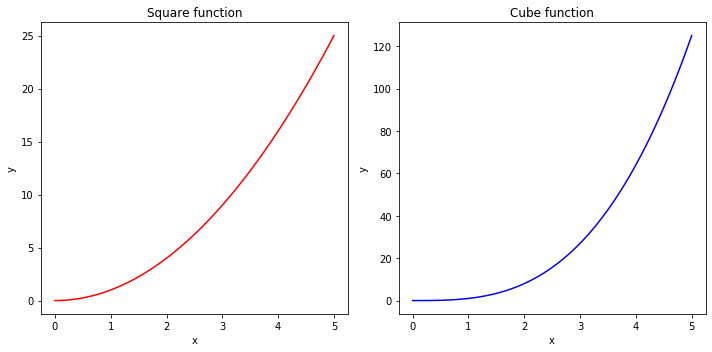

In [78]:
fig, axes = plt.subplots(ncols=2, figsize = (10,5))
y = [y1, y2]
labels = ['Square function', 'Cube function']
colors = ['r', 'b']
for i, ax in enumerate(axes):
    ax.plot(x, y[i], colors[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(labels[i])  
fig.tight_layout()  # Option to prevent overlapping of the plots
plt.show()

An always useful thing is to label different plots on the same figure and display the legend with the corresponding labels. The easiest way to do this is assigning a label to each of the plots when calling the `plot()` function, and at the end of the image calling the function `legend()`:

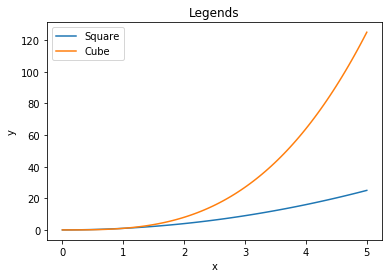

In [ ]:
fig, ax = plt.subplots()  # Equivalent to fig = plt.figure() and ax = fig.add_subplot(111)
ax.plot(x, y1, label='Square')
ax.plot(x, y2, label='Cube')
ax.legend(loc=2)  # Location of the legend can be modified with this parameter
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Legends')
plt.show()

Error bars can be added in both the $x$ and $y$ axes. This is achieved using the `errorbar` function

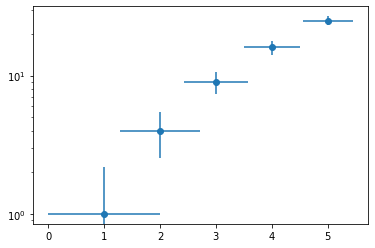

In [ ]:
xs = np.linspace(1, 5, 5)
ys = xs ** 2
xerr = 1 / np.sqrt(xs)
yerr = xs ** (1 / 3) + [0.2 for _ in xs]

fig, ax = plt.subplots()
ax.errorbar(xs, ys, xerr=xerr, yerr=yerr, ls='none', fmt='o')    # ls is for line style, fmt for format
ax.set_yscale('log')
plt.show()

Matplotlib can also handle LaTeX formulas and font changes. LaTeX formulas need to be enclosed in $$, preceded by an `r` to avoid problems with backslashes. For global font changes, one has to update the Matplotlib configuration parameters. TeX can be used to process all the text in the figure as well, although a TeX compiler is needed in this case.

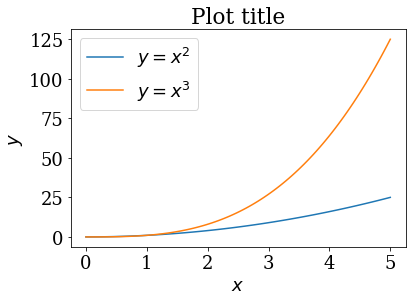

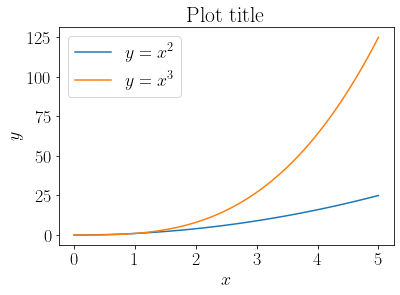

In [ ]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

fig, ax = plt.subplots()
ax.plot(x, y1, label=r'$y = x^2$')
ax.plot(x, y2, label=r'$y = x^3$')
ax.legend(loc=2)  # upper left corner
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Plot title')
plt.show()

matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

fig, ax = plt.subplots()
ax.plot(x, y1, label=r'$y = x^2$')
ax.plot(x, y2, label=r'$y = x^3$')
ax.legend(loc=2)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Plot title')
plt.show()

# Restore to defaults
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

Matplotlib can also handle 3-dimensional plots. For that we need to import the 3-dimensional axes submodule

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

And now we can, for instance, plot surfaces

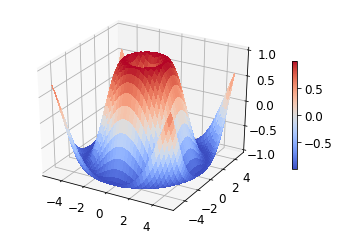

In [ ]:
X = np.linspace(-5, 5, 40)
Y = np.arange(-5, 5, 0.25)  # Defining an array of equi-spaced numbers
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5)

plt.show()

The rest is all about exploring the parameter space. Here we manually create a grid (this is necessary if we mix 2D, 3D or polar coordinates), and plot a bunch of things that Matplotlib can do. For more examples, refer to the [gallery](http://matplotlib.org/gallery.html).

let's do a histogram. 
1) define an array of random numbers, n for normally distributed 
2) Bins describes how many intervals we'll plot.


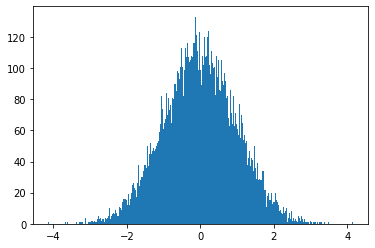

In [81]:
n=np.random.randn(10000)
plt.hist(n, bins=300);

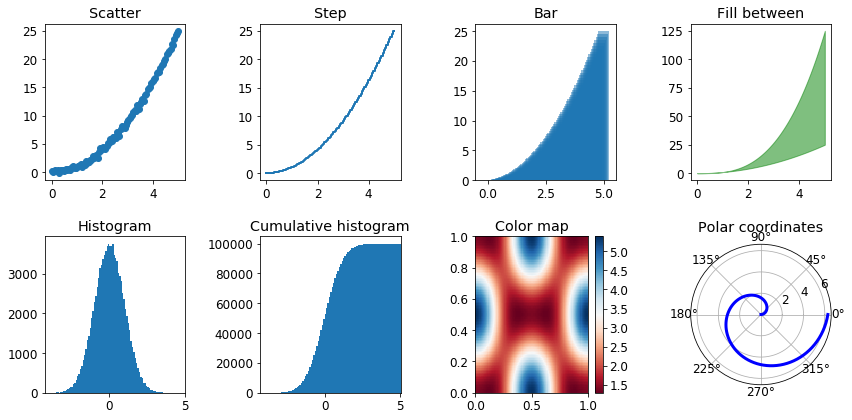

In [ ]:
# Some new data will be necessary
n = np.random.randn(100000)
t = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(t, t)
Z = (2.7 - 2 * np.cos(Y) * np.cos(X) - 0.7 * np.cos(np.pi - 2*Y)).T

# The actual plot
fig = plt.figure(figsize=(12, 6))
axes = [[],[]]

axes[0].append(fig.add_subplot(2, 4, 1))
axes[0][0].scatter(x, x ** 2 + 0.25 * np.random.randn(len(x)))
axes[0][0].set_title('Scatter')

axes[0].append(fig.add_subplot(2, 4, 2))
axes[0][1].step(x, y1, lw=2)
axes[0][1].set_title('Step')

axes[0].append(fig.add_subplot(2, 4, 3))
axes[0][2].bar(x, y1, align='center', width=0.5, alpha=0.5)
axes[0][2].set_title('Bar')

axes[0].append(fig.add_subplot(2, 4, 4))
axes[0][3].fill_between(x, y1, y2, color='green', alpha=0.5);
axes[0][3].set_title('Fill between');

axes[1].append(fig.add_subplot(2, 4, 5))
axes[1][0].hist(n, bins=100)
axes[1][0].set_title('Histogram')
axes[1][0].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 6))
axes[1][1].hist(n, bins=100, cumulative=True)
axes[1][1].set_title('Cumulative histogram')
axes[1][1].set_xlim((min(n), max(n)))

axes[1].append(fig.add_subplot(2, 4, 7))
p = axes[1][2].pcolor(X / (2 * np.pi), Y / (2 * np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
axes[1][2].set_title('Color map')
fig.colorbar(p, ax=axes[1][2])

axes[1].append(fig.add_subplot(2, 4, 8, polar=True))
axes[1][3].plot(t, t, color='blue', lw=3);
axes[1][3].set_title('Polar coordinates')

fig.tight_layout()
plt.show()

**Exercise 1**. Create a three by three grid. Put the BIST logo in the center. Surround him with aesthetically pleasing functions in the remaining subplots. Hint: `matplotlib.image.imread("http://bist.eu/wp-content/uploads/2016/05/BIST-7-centres-GRISOS.png")` will get you the BIST logo, and the function `imshow` will plot it.

Why do we want pandas? We can work with dataframes


### Seaborn and Pandas

Seaborn is primarily meant for statistical plotting, but it also improves the defaults of all Matplotlib figures.

#### Side Effect of Importing Seaborn
 
Witness the magic:

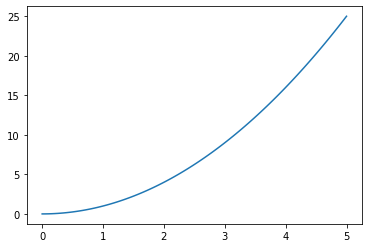

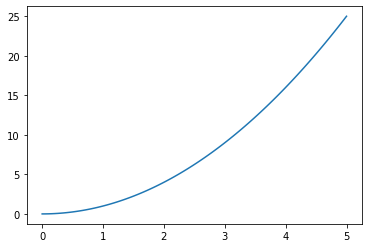

In [83]:
plt.plot(x, x**2)
plt.show()
import seaborn as sns
plt.plot(x, x**2)
plt.show()

#### Add Pandas

Pandas turns Python into a competitor to R. It allows you to do a wide-scale of statistical operations, but even more importantly, it makes low-level data processing chores easy. Here we load the standard Iris dataset from the web and convert it to a Pandas dataframe, which is the key data structure of the package.

In [84]:
import pandas as pd

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'])
iris.head() #shows the first five rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plotting with Pandas can be as easy as calling the `plot` command of the dataset.

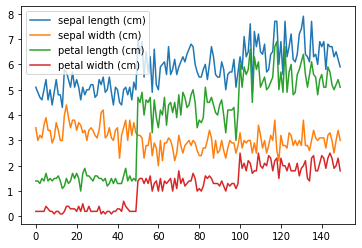

In [86]:
iris.plot() #this plots everything

We will however use seaborn for some still basic but nicer and more complete visualization. In this case it plots two things at the same time and allows comparison. this is why we use seaborn (sns)

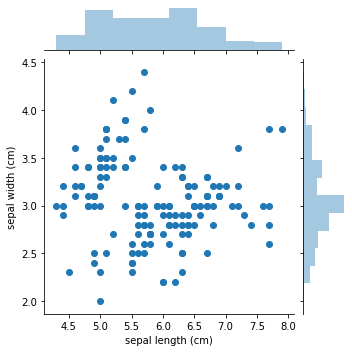

In [ ]:
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, height=5);

Let us define an array with all the names of the features and plot their correlations. 

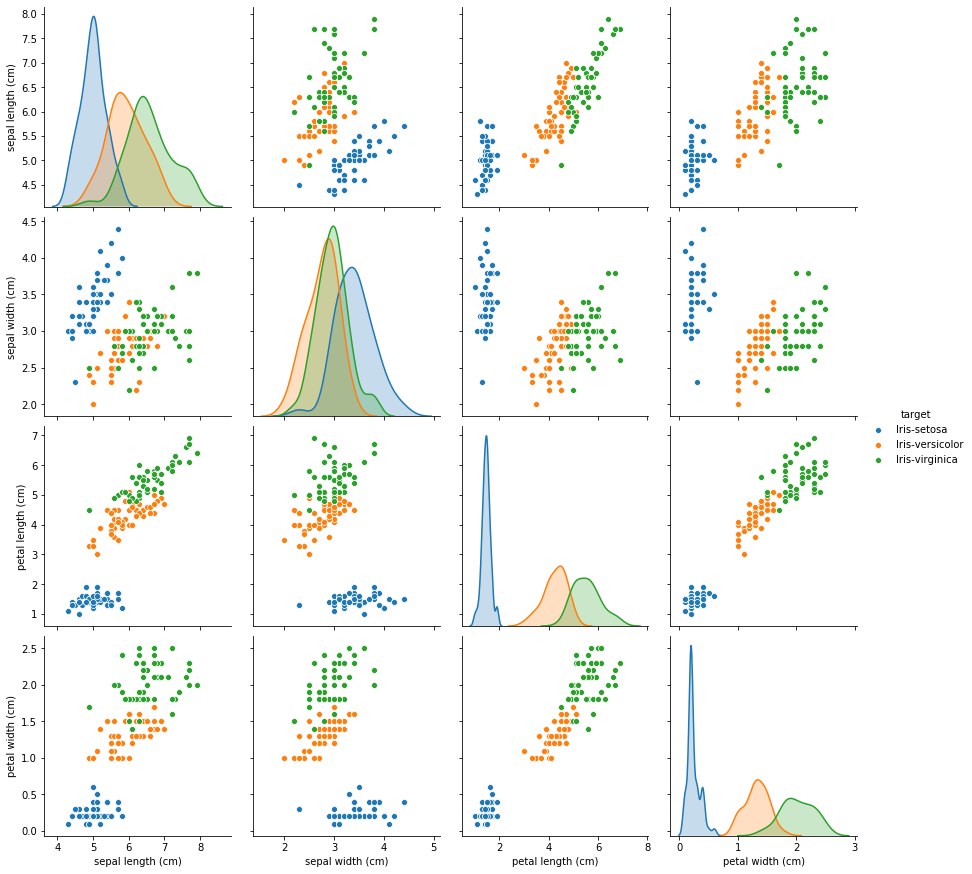

In [87]:
features = iris.columns.values[:-1] #we don't want to take the target it just plots all info in the dataset
sns.pairplot(iris, vars=features, hue='target', height=3); #hue: color, target for us is

**Exercise 2**. Plot the histogram of all four features. First, instantiate a Matplotlib figure in a one by four grid, and then pass the matching axes to Seaborn's `distplot` function that draws the histograms. A `figsize=(14, 4)` is a recommended parameter to `plt.subplots`, otherwise the figure will be too squished.

*Optional: Use `zip` to iterate over the axes and the features simultaneously.*

The curve you see in the image is the kernel density estimation, the density function that better approximates the observed distribution

You might have noticed by now than Seaborn not only produces nicer plots, but also sometimes performs some data analysis on its own. Recall the `jointplot` a few steps above, where we were getting the Pearson's $r$ coefficient and the corresponding $p$ value. There is a special argument that you can pass to `jointplot` to plot a more complete analysis with the regression line, confidence intervals and kernel density estimation, the `kind` option:

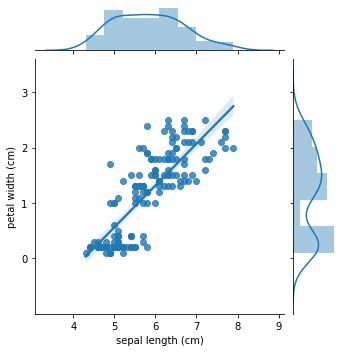

In [89]:
sns.jointplot(x='sepal length (cm)', y='petal width (cm)', data=iris, height=5, kind='reg') # we can do a linear regresion. Only for visualizing though

However, for general regression the most common plot is the `regplot`. It can perform linear and simple nonlinear regressions, eliminate outliers, and easily plot conditional data, among others. There is a nice tutorial on all these functionalities [here](https://seaborn.pydata.org/tutorial/regression.html).

For instance, we can fit data to high-order polynomials by passing the argument `order`:

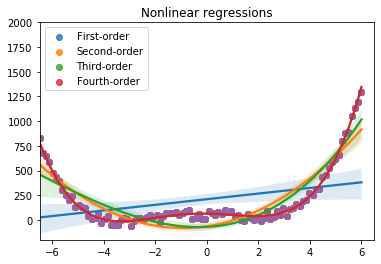

In [93]:
x = np.linspace(-6.5, 6, 100)
y = x ** 4 + 2 * x ** 3 - 12 * x ** 2 - 2 * x + 6 * np.ones(len(x))
y = y + 100 * np.random.rand(len(x))

sns.regplot(x, y, label='First-order')
sns.regplot(x, y, order=2, label='Second-order')
sns.regplot(x, y, order=3, label='Third-order')
sns.regplot(x, y, order=4, label='Fourth-order')
sns.regplot(x, y, fit_reg=False)    # Plot the data in another color

plt.xlim(-6.5,6.5)
plt.ylim(-200,2000)

plt.legend()
plt.title('Nonlinear regressions')
plt.show()

**Exercise 3**. Plot the marginal distributions of `petal length` versus `sepal length` for each of the three families of  flowers. First plot the three of them in the same plot, then do it on separate subplots. Note that when you are doing the three on the same plot, you will have to modify your axes length to see all the data.

## Diffusion: a visual approach

One of the scenarios in which statistics is most used in physics is in the study of stochastic process. In stochastic process, some of the variables take random values. Then, in order to study such systems, one needs to come with clever techniques. In the contrary, we could be looking just at the random noise generated by the process.

In this session, we will take a closer look to what is called the diffusion problem, and more particularly, to the Brownian motion. Brownian motion was first *experimentally* discovered in 1826 by Robert Brown. It was not until 1905 that, simulaneously, Einstein and Smoluchowski developed the theory of diffusion and correctly explaining what Brown was observing. In his experiments, he saw that microscopical particles suspended in liquid show a jittering motion, which could not be explained by any of the existing theories. Einstein and Smoluchowski correctly predicted that such motion was due to the collision of the atoms and molecules of the liquid with the microscopical particles. However, due the huge number of collisions, it was impossible to develop a deterministic theory. In plain words, you never know were the next collision will happen and hence to which direction the particle will be pushed. To account for this, they proposed that the particled had a probability $P(x,t)$ to be in the position $x$ at time $t$. Then, its evolution was given by the diffusion equation:
\begin{equation}
\frac{d}{dt}P(x,t)=D\frac{d^2}{dx^2} P(x,t)
\end{equation}
where $D$ is defined as the diffusion coefficient. If the particle is released at the origin at time $t = 0$ in an unbounded space, the solution of the diffusion equation is the normalised Gaussian PDF:
$$
P(x,t) = \frac{1}{\sqrt{4\pi D t}}\exp\left({-\frac{x^2}{4Dt}}\right)
$$

**Exercise 2: Random walks, a discrete approach to Brownian motion.** Almost at the same time Einstein and Smoluchowski developed the diffusion theory, Karl Pearson introduced what we know now as random walks. A random walker performs steps of regular length, but with random directions. This means that at each step, the walker throws a coin to see in which direction he goes. Your goal in this exercise is to check whether the random walk is a correct approximation to Brownian motion. To do this, you should follow the next steps:
- Generate a function that given as input $T$ and $N$, generates a $N$ random walks in one dimension (i.e. only left and right) with step length of 1. The function should output the final position of the $N$ walkers. *Trick: you can either use a for loop to perform a random walk, or generate all the steps (i.e. $\pm 1$ in this case) at once and perform a cumulative sum over it.*
- Run the function >1000 times (as much as your computer allows, without exploding or waiting 123 years) to collect enought final positions for $T=10$.
- Using the `seaborn` library and in particular the distplot, compare the results you have obtained with the PDF of the Brownian motion for $D=1/2$. Why this number? You can check it [here](https://www.csie.ntu.edu.tw/~lyuu/finance1/2014/20140423.pdf).
- If everything went well, you should see a regular oscillation in your simulated data (i.e. the fitting that `seaborn` did). Such oscillations does no appear in the theoretical curve. Where does this oscillation come from?

**Exercise 3 - Sampling from a given distribution function** In this exercise, we will take a look at a typical problem you may find while working with statitics and stochastic problems. Let's say that you are given a probability distribution function (PDF), e.g. $P(x)$. How do you sample numbers from this distribution? One of the usual approaches is to use the [Inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling). The method works as following:
1. Generate a random number $u$ from a continuous distribution $\in [0,1]$. This is easily done with `np.random.rand()`.
2. Calculate the cumulative distribution function (CDF) of $P(x)$, $C(x)$, and find its inverse $C^{-1}(x)$. 
3. Compute $x=C^{-1}(u)$. The random variable $x$ then follows the PDF $P(x)$.

- Your first task is to sample 10000 numbers from the PDF $\psi(t) = (\alpha-1) t^{-1-\alpha}$, where $0<\alpha<1$. Use any of the plotting tools above to check that you correctly sample. Due to the properties of $\psi(t)$, there is a probability of sampling a very big number. First of all, discard all numbers $> 100$. Use for instance $\alpha = 0.5$. For plotting the random numbers generated, you can use `hist, bins = np.histogram` and then plotting the results. Plotting directly with `hist` will also work but the plot will be much uglier...


Now, we will use this technique to simulate a Continuous Time Random Walk (CTRW). This model considers a Brownian particle, but at each step, the walker stops for certain time, the *waiting time*, drawn from the distribution $\psi(t) = t^{-1-\alpha}$. To save some time, let us use a custom python package that simulates it for us:

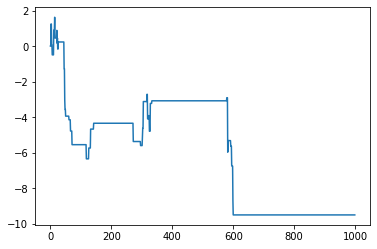

In [13]:
import andi
# T is the number of steps we want, alpha the value that goes in the waiting time distribution psi(t)
trajectory = andi.diffusion_models.oneD().ctrw(T = 1000, alpha = 0.7)
# A simple plot
plt.plot(trajectory)

Now, what is the difference between the normal Brownian motion and CTRW? To check it, let's perform some averages!

- Generate 10000 trajectories of BM and CTRW with $T = 1000$ steps. If you don't trust your own implementation of BM, you can use `andi.utils_andi.bm1D(T, D )`. For CTRW, consider $\alpha = 0.5$. For Brownian motion, use $D=0.01$.
- Calculate the mean squared displacement $\left < x^2(t) \right >$. This means, take the square of each trajectory and average over the set of 1000 trajectories.
- Plot the mean squared displacement for both BM and CTRW). Can you see any difference? 

## (Optional) Interactive Plotting

Now we turn to review some packages very useful not only for visualizing data, but also interacting with it and obtaining individual information about the points studied. In particular we will review briefly the interactive capabilities of [Matplotlib](https://matplotlib.org/users/interactive.html), after which we will move on to the dedicated package [Bokeh](http://bokeh.pydata.org/en/latest/).

### Matplotlib

Matplotlib contains some [interacting capabilities](https://matplotlib.org/users/interactive.html), although in general it is heavier to code and most of the features have to be coded by hand (and, as you will see, some of the features are not flawlessly implemented with Jupyter). Let us analyze an example where clicking on points give you the information about them.

In [ ]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Click on points')

line, = ax.plot(np.random.rand(100), 'o', picker=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    print('onpick points:', points)

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

Using matplotlib backend: Qt5Agg
onpick points: ((22.0, 0.16114210546323915),)
onpick points: ((64.0, 0.9295746012177428),)
onpick points: ((64.0, 0.9295746012177428),)
onpick points: ((72.0, 0.8404940074080826),)
onpick points: ((57.0, 0.39081197923222777),)
onpick points: ((57.0, 0.39081197923222777),)
onpick points: ((68.0, 0.2728773454043413),)


You see it is relatively simple to create these interactive plots. However, Bokeh makes it everything much much simpler, and has a lot of interactive tools already built in.

### Bokeh

[Bokeh](http://bokeh.pydata.org/en/latest/) is a Python interactive visualization library. Not only it allows for creating aesthetically-pleasant plots (we already have Seaborn for that), but it also gives a lot of power to _interact with_ the plot. You can zoom, pan, focus on a subset of data..., and obtain live information of each data point as you scroll the mouse over it. As we will see, one of the peculiarities of Bokeh is that it does not operate on the notebook, but every plot is opened in a browser tab. Indeed, Bokeh "translates" the plot into HTML code that can then be shared easily without losing the interactivity.

Let us begin with a simple example with randomly-generated points

In [ ]:
import bokeh
import bokeh.plotting as bkh

In [ ]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5

# Colors for the points. Each color is written in RGB format #RRGGBB, where each of the intensities is specified by
# a 2-digit hexadecimal number. Each of these numbers is specified by a string %02x. Note that we keep the
# intensity of B constant, while R and G depend on the specific point
colors = ['#%02x%02x%02x' % (int(r), int(g), 150) for r, g in zip(50 + 2 * x, 30 + 2 * y)]

Bokeh contains some tools to interact with the plots. These include zooming, selecting som subset of data, panning... etc. You can check all the tools available in the [documentation](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#built-in-tools)

In [ ]:
TOOLS = 'hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select'

As usual, we create a figure, now with the tools needed, and once the figure is created we can insert the plot. The only difference is that the command `show` will now open a new tab where the plot will be displayed

In [ ]:
p = bkh.figure(tools=TOOLS, title='Color scatter')

p.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

bkh.output_file('color_scatter.html', title='Color scatter example')

bkh.show(p)

Note that to export the plots now we have called the `output_file` command, instead of Matplotlib's `savefig`. There is a difference, however: `output_file` can be called *before* creating the Figure environment and doing the plot (we will see an example a bit below), because it sets a higher "environment" where the figure will be created. Spend two minutes playing with the plot, using the tools and checking how information of the individual datapoints can be accessed.

Bokeh works very similarly to Seaborn+Pandas in terms of syntax. The information of individual datapoints is contained in a `ColumnDataSource`, which can accept Pandas dataframes as inputs. Then, the information to display is specified when creating a custom `HoverTool` (included in `bokeh.models`). For example, let's say we want to show, for each point, not only its coordinates but also the information about its color and its radius.